In [1]:
# Imports
# !pip install torchinfo
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
from torchinfo import summary
import matplotlib.pyplot as plt
import numpy as np
import random
import os
import time
import TrainingPresets as TP

In [2]:
import model_v01b3 as mymodel

In [3]:
torch.cuda.get_device_name(0)
m1 = mymodel.MyModel().to(torch.device("cuda:1"))
summary(m1, input_size=(2, 90, 100))

Layer (type:depth-idx)                   Output Shape              Param #
MyModel                                  [1, 3]                    --
├─MyEncoder: 1-1                         [1, 86, 128]              --
│    └─MyEncodeCNN: 2-1                  --                        3,445,504
│    │    └─Sequential: 3-1              [1, 16, 30, 98]           160
│    │    └─Sequential: 3-2              [1, 32, 26, 94]           12,832
│    │    └─Sequential: 3-3              [1, 64, 22, 90]           51,264
│    │    └─Sequential: 3-4              [1, 128, 18, 86]          204,928
│    └─MyEncodeCNN: 2-2                  --                        3,445,504
│    │    └─Sequential: 3-5              [1, 16, 30, 98]           160
│    │    └─Sequential: 3-6              [1, 32, 26, 94]           12,832
│    │    └─Sequential: 3-7              [1, 64, 22, 90]           51,264
│    │    └─Sequential: 3-8              [1, 128, 18, 86]          204,928
│    └─MyEncodeLSTM: 2-3                 --

In [78]:
datadir = '../Dataset/0317make01/'
print(os.listdir(datadir))

['sid.npy', 'csi.npy', '.ipynb_checkpoints']


In [104]:
mydata = TP.MyDataset(datadir + 'csi.npy', datadir + 'sid.npy')
print(mydata.data['x'].shape, mydata.data['y'].shape)

train_size = int(len(mydata) * 0.7)
valid_size = int(len(mydata) * 0.2)
test_size = int(len(mydata)) - train_size - valid_size
print(train_size, valid_size, test_size)

train_loader, valid_loader, test_loader = TP.split_loader(mydata, train_size, valid_size, test_size, 8)

loaded
(1500, 2, 90, 100) (1500,)
1050 300 150
1050 300 150


In [58]:
# Hyperparameters
args = TP.MyArgs(cuda=1, epochs=100, learning_rate=0.001, criterion=nn.CrossEntropyLoss())

In [119]:
# Model and Loss
model = mymodel.MyModel().to(args.device)
optimizer = torch.optim.Adam

trainer = TP.Trainer(model, args, 
                     train_loader, valid_loader, test_loader, optimizer)

In [118]:
# When changing learning rate
args = TP.MyArgs(cuda=1, epochs=100, learning_rate=0.0001, criterion=nn.CrossEntropyLoss())
trainer.args = args

In [120]:
# Training and Saving
trainer.train_and_eval()

epoch=99/100,130/131of train, loss=0.01160305669237e-0888
Total training time: 657.9833607673645 sec


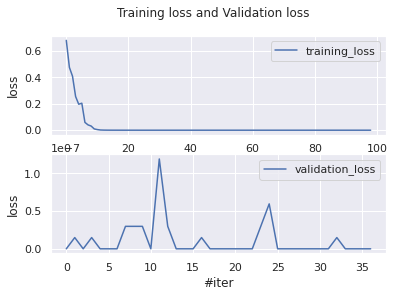

In [121]:
# Plot loss curves
%matplotlib inline
trainer.plot_loss()

In [122]:
  #=====================test============================
trainer.test()

120/150of test, loss=0.08370445162873e-07

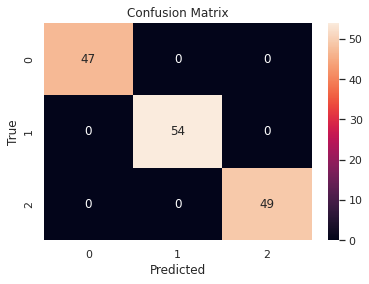

In [123]:
%matplotlib inline

def fromonehot(inlist):
    out = []
    for item in inlist:
        if np.argmax(item) == 0:
            out.append(0)
        elif np.argmax(item) == 1:
            out.append(1)
        elif np.argmax(item) == 2:
            out.append(2)
    return out

trainer.plot_test_results()

In [124]:
torch.save(trainer.model.state_dict(),
           '../Models/v01b3+0317make01+ep100.pth')